In [1]:
import vaft
import omas
from omfit_classes.omfit_eqdsk import OMFITgeqdsk
import os
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

Load and test sample thomson scattering files

[INFO] Loading Thomson scattering data from: /srv/vest.diagnostic/45414_NeTe.mat (version: v11)
[INFO] Loading Thomson scattering data from: /srv/vest.diagnostic/NeTe_Shot40323_v9_rev.mat (version: v9_rev)
[INFO] Thomson data successfully loaded into ODS structures.


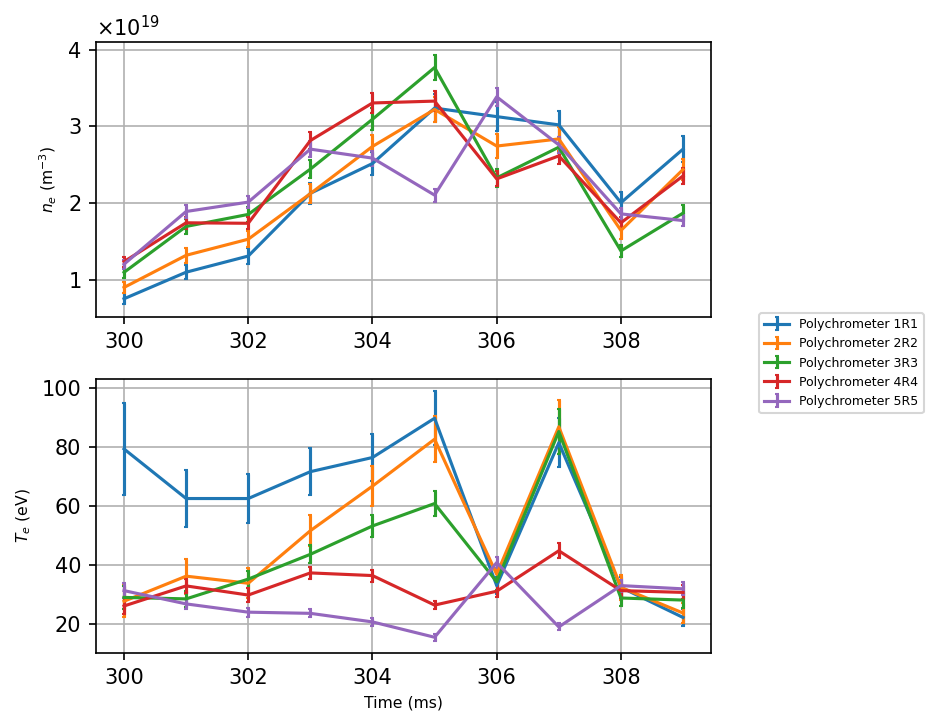

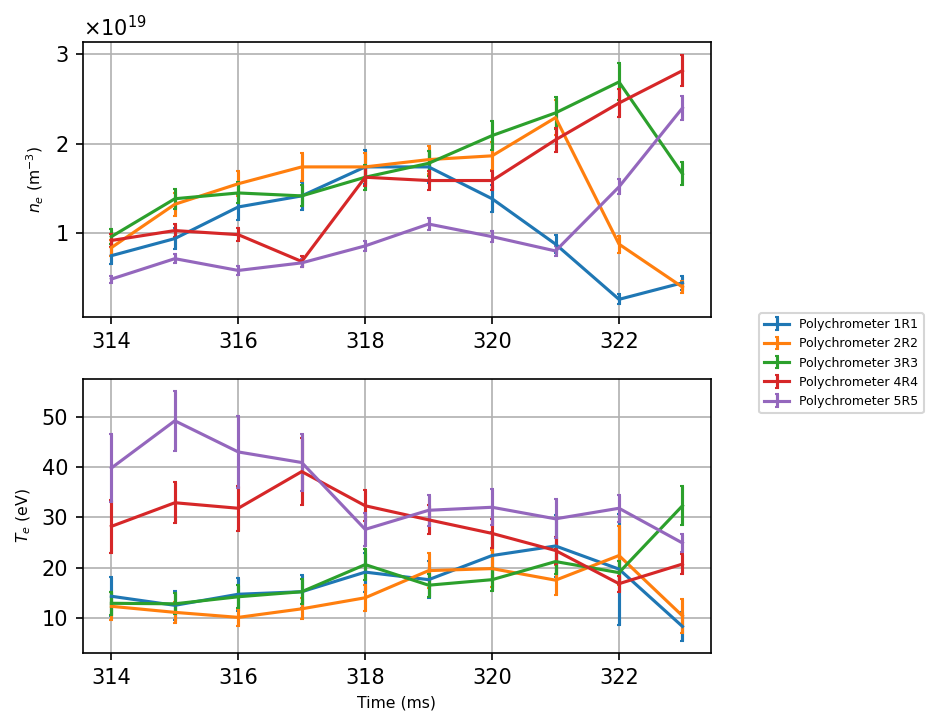

In [2]:
import vaft
from pathlib import Path
from omas import *  
import matplotlib.pyplot as plt

new_thomson = '46051_NeTe.mat'
old_thomson = 'NeTe_Shot39915_v9_rev.mat'

data_dir = Path(vaft.__file__).resolve().parent / "data"
file_new = data_dir / new_thomson
file_old = data_dir / old_thomson

ods_new_thomson = ODS()
ods_old_thomson = ODS()

file_new = '/srv/vest.diagnostic/45414_NeTe.mat'
file_old = '/srv/vest.diagnostic/NeTe_Shot40323_v9_rev.mat'
vaft.machine_mapping.thomson_scattering(ods_new_thomson, 46051, file_new)
vaft.machine_mapping.thomson_scattering(ods_old_thomson, 39915, file_old)

print("[INFO] Thomson data successfully loaded into ODS structures.")

vaft.plot.plot_thomson_time_series(ods_new_thomson)
vaft.plot.plot_thomson_time_series(ods_old_thomson)

In [2]:
df= vaft.database.exist_ts_file()

Available Thomson Scattering Shots:

|   Index |   Shot Number | Last Processed             | Status       |
|---------|---------------|----------------------------|--------------|
|       1 |         22027 | 2023-02-02T23:24:20        | invalid      |
|       2 |         39513 | 2024-08-06T11:18:45.556514 | thomson_only |
|       3 |         39515 | 2024-08-06T11:19:39.748631 | thomson_only |
|       4 |         39906 | 2024-08-06T11:20:05.668157 | core_profile |
|       5 |         39915 | 2024-05-14T16:42:35.439538 | invalid      |
|       6 |         39916 | 2024-07-08T20:11:09.953256 | thomson_only |
|       7 |         39917 | 2023-07-05T20:47:14        | thomson_only |
|       8 |         40282 | 2024-08-06T11:20:28.826835 | core_profile |
|       9 |         40323 | 2023-07-28T16:04:09        | core_profile |
|      10 |         40324 | 2023-07-28T16:05:23        | thomson_only |
|      11 |         40325 | 2023-07-28T16:06:39        | core_profile |
|      12 |         40326 |

In [4]:
core_profile_shot=df[df['Status']=='core_profile']
print(core_profile_shot['Shot Number'].values)

[39906 40282 40323 40325 40326 40327 40328 40330 40331 41261 41262 41672
 42947 42962 42963 44404 44405 44411 44413 44419 44420 44421 44427 44428
 44430 44438 45534 45537 46050]


In [4]:
ods = vaft.database.load(40330,'public')

Successfully loaded ODS data for shot: 40330


[INFO] Using equilibrium time slice 0


TypeError: 'int' object is not subscriptable

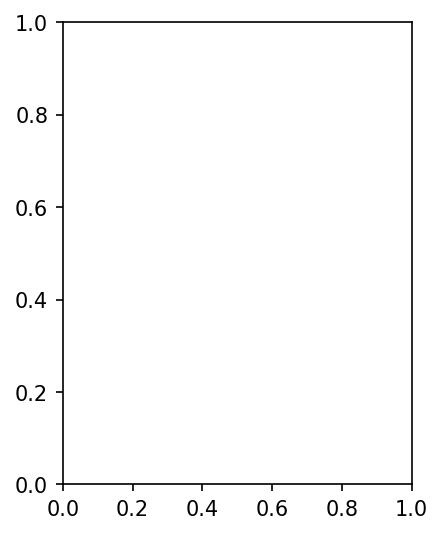

In [14]:
vaft.plot.plot_thomson_radial_position(ods)

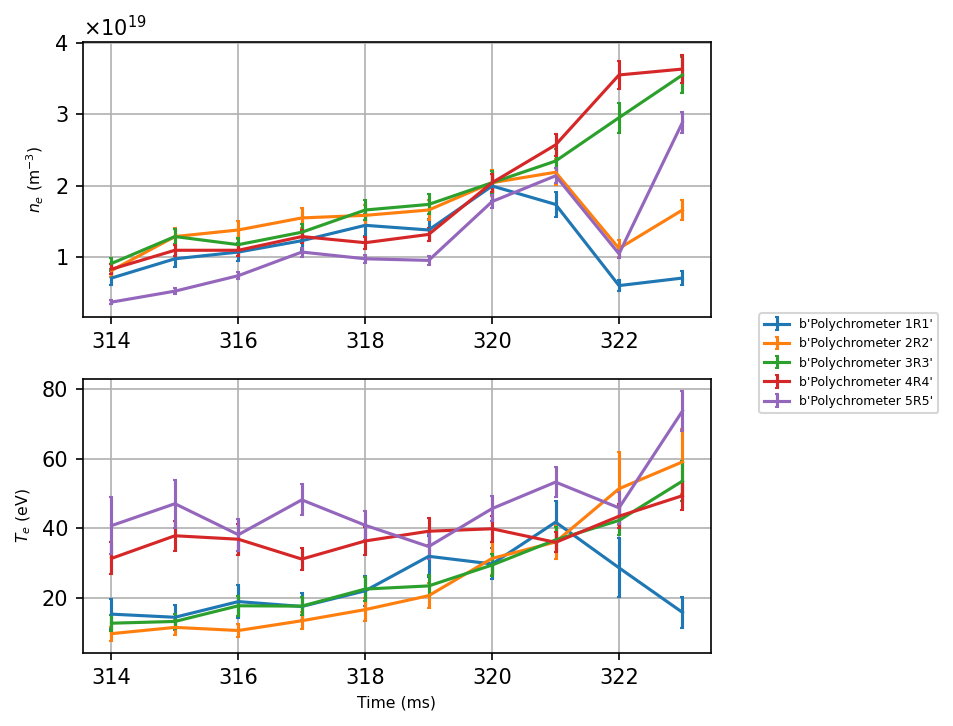

In [9]:
vaft.plot.plot_thomson_time_series(ods)

[INFO] Found 4 fitted core_profiles


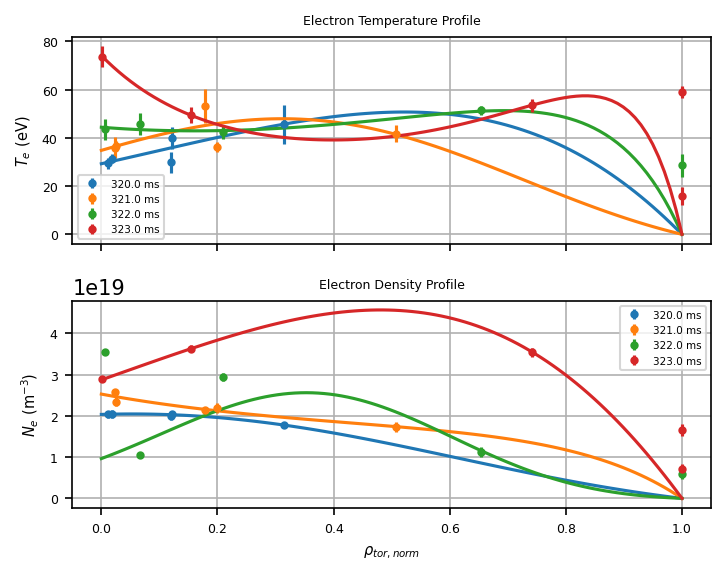

In [16]:
vaft.plot.plot_thomson_profiles(ods)

## **Comparison between different fitting methods**
 #### - These method is to compare fitting methods. Currently 6 different methods are tested. shot 40330 and shot 00000 is also used for testing these shot
 #### - Currently all the default settings for fittings are : 
    1. Te : polynomial / order = 2
    2. Ne : exponential / order = 2

In [2]:
ods = vaft.database.load(40330,'public')
ods2 = vaft.database.load(46050,'public')

Successfully loaded ODS data for shot: 40330
Successfully loaded ODS data for shot: 46050


In [5]:
fit_cases = [
    dict(name="GP", te="gp", ne="gp", Te_order=3, Ne_order=3),
    dict(name="Poly O2", te="polynomial", ne="polynomial", Te_order=2, Ne_order=2),
    dict(name="Poly O3", te="polynomial", ne="polynomial", Te_order=3, Ne_order=3),
    dict(name="Exp O2", te="exponential", ne="exponential", Te_order=2, Ne_order=2),
    dict(name="Sqrt", te="sqrt", ne="sqrt", Te_order=3, Ne_order=3),
    dict(name="Sqrt Exp", te="sqrt_exp", ne="sqrt_exp", Te_order=3, Ne_order=3),
]

## TESTing for shot 40330

In [ ]:
outdir = "./temps"
os.makedirs(outdir, exist_ok=True)

In [3]:
time_ms_list = [
    float(ods['core_profiles.profiles_1d'][i]['time']) * 1e3
    for i in range(len(ods['core_profiles.profiles_1d']))
]

shot = 40330
# --- precompute mapped_rho for each time ---
mapped_rho_cache = {}
for time_ms in time_ms_list:
    geq_filename = f"/srv/vest.filedb/public/{shot}/chease/g0{shot}.00{int(time_ms):03}"
    geq = OMFITgeqdsk(filename=geq_filename)
    geq['fluxSurfaces'].load()

    mapped_rho_cache[time_ms] = vaft.process.equilibrium_mapping_thomson_scattering(ods, geq)


Flux surfaces from 513x513 gEQDSK
Levels based on psi ...
Grid diagonal resolution: 0.001994316322620856 [m]
Cropping tables ...
Find magnetic axis ...
Tracing flux surfaces ...
  > Took 0:00:05.829712
Find Br, Bz, F on flux surfaces ...
  > Took 0:00:00.467617
Flux surface averaging ...
  > Took 0:00:00.558305
Geometric quantities ...
  > Took 0:00:01.206851
Flux surfaces from 513x513 gEQDSK
Levels based on psi ...
Grid diagonal resolution: 0.0016033370706069266 [m]
Cropping tables ...
Find magnetic axis ...
Tracing flux surfaces ...
  > Took 0:00:05.866344
Find Br, Bz, F on flux surfaces ...
  > Took 0:00:00.472250
Flux surface averaging ...
  > Took 0:00:00.562361
Geometric quantities ...
  > Took 0:00:01.186060
Flux surfaces from 513x513 gEQDSK
Levels based on psi ...
Grid diagonal resolution: 0.0013010164626873725 [m]
Cropping tables ...
Find magnetic axis ...
Tracing flux surfaces ...
  > Took 0:00:05.944012
Find Br, Bz, F on flux surfaces ...
  > Took 0:00:00.480465
Flux surface

[UPDATED] core_profile at 320.000 ms (index 0)
[UPDATED] core_profile at 321.000 ms (index 1)
[UPDATED] core_profile at 322.000 ms (index 2)
[UPDATED] core_profile at 323.000 ms (index 3)
[INFO] Found 4 fitted core_profiles
[UPDATED] core_profile at 320.000 ms (index 0)
[UPDATED] core_profile at 321.000 ms (index 1)
[UPDATED] core_profile at 322.000 ms (index 2)
[UPDATED] core_profile at 323.000 ms (index 3)
[INFO] Found 4 fitted core_profiles
[UPDATED] core_profile at 320.000 ms (index 0)
[UPDATED] core_profile at 321.000 ms (index 1)
[UPDATED] core_profile at 322.000 ms (index 2)
[UPDATED] core_profile at 323.000 ms (index 3)
[INFO] Found 4 fitted core_profiles
[UPDATED] core_profile at 320.000 ms (index 0)
[UPDATED] core_profile at 321.000 ms (index 1)
[UPDATED] core_profile at 322.000 ms (index 2)
[UPDATED] core_profile at 323.000 ms (index 3)
[INFO] Found 4 fitted core_profiles
[UPDATED] core_profile at 320.000 ms (index 0)
[UPDATED] core_profile at 321.000 ms (index 1)
[UPDATED] 

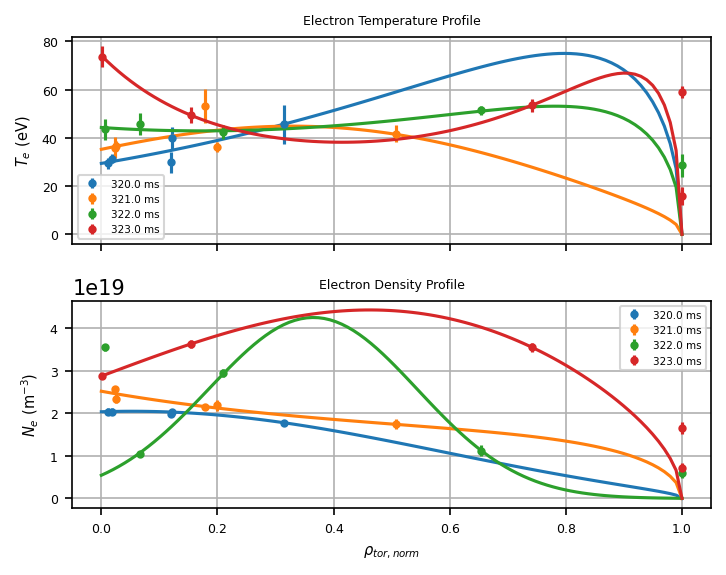

In [6]:
def save_thomson_plot_to_file(ods_obj, png_path):
    plt.close("all")
    vaft.plot.plot_thomson_profiles(ods_obj, save_opt=1, file_name=png_path)
png_paths = []

ods_base = deepcopy(ods)  # 원본 보존

for cfg in fit_cases:
    ods_m = deepcopy(ods_base)

    # (중요) 기존 core_profiles 키 자체를 없애고 새로 채우는 게 안전
    if 'core_profiles' in ods_m:
        del ods_m['core_profiles']

    for time_ms in time_ms_list:
        mapped_rho = mapped_rho_cache[time_ms]

        n_e_fn, T_e_fn, *_ = vaft.process.profile_fitting_thomson_scattering(
            ods_m, time_ms, mapped_rho,
            Te_order=cfg["Te_order"],
            Ne_order=cfg["Ne_order"],
            fitting_function_te=cfg["te"],
            fitting_function_ne=cfg["ne"],
        )

        ods_m = vaft.process.core_profiles(ods_m, time_ms, mapped_rho, n_e_fn, T_e_fn)
        omas.omas_physics.core_profiles_pressures(ods_m, update=True)

    png_path = os.path.join(outdir, f"shot{shot}_{cfg['name'].replace(' ','_')}.png")
    png_path = os.path.join(outdir, f"shot{shot}_{cfg['name'].replace(' ','_')}.png")
    save_thomson_plot_to_file(ods_m, png_path)
    png_paths.append((cfg["name"], png_path))


## testing with 46050 shot

In [8]:
time_ms_list = [
    float(ods2['core_profiles.profiles_1d'][i]['time']) * 1e3
    for i in range(len(ods2['core_profiles.profiles_1d']))
]

shot = 46050
# --- precompute mapped_rho for each time ---
mapped_rho_cache = {}
for time_ms in time_ms_list:
    geq_filename = f"/srv/vest.filedb/public/{shot}/chease/g0{shot}.00{int(time_ms):03}"
    geq = OMFITgeqdsk(filename=geq_filename)
    geq['fluxSurfaces'].load()

    mapped_rho_cache[time_ms] = vaft.process.equilibrium_mapping_thomson_scattering(ods, geq)


Flux surfaces from 513x513 gEQDSK
Levels based on psi ...
Grid diagonal resolution: 0.001947284499154554 [m]
Cropping tables ...
Find magnetic axis ...
Tracing flux surfaces ...
  > Took 0:00:05.834825
Find Br, Bz, F on flux surfaces ...
  > Took 0:00:00.471043
Flux surface averaging ...
  > Took 0:00:00.563051
Geometric quantities ...
  > Took 0:00:01.210553


[UPDATED] core_profile at 304.000 ms (index 0)
[INFO] Found 1 fitted core_profiles
[UPDATED] core_profile at 304.000 ms (index 0)
[INFO] Found 1 fitted core_profiles
[UPDATED] core_profile at 304.000 ms (index 0)
[INFO] Found 1 fitted core_profiles
[UPDATED] core_profile at 304.000 ms (index 0)
[INFO] Found 1 fitted core_profiles
[UPDATED] core_profile at 304.000 ms (index 0)
[INFO] Found 1 fitted core_profiles
[UPDATED] core_profile at 304.000 ms (index 0)
[INFO] Found 1 fitted core_profiles


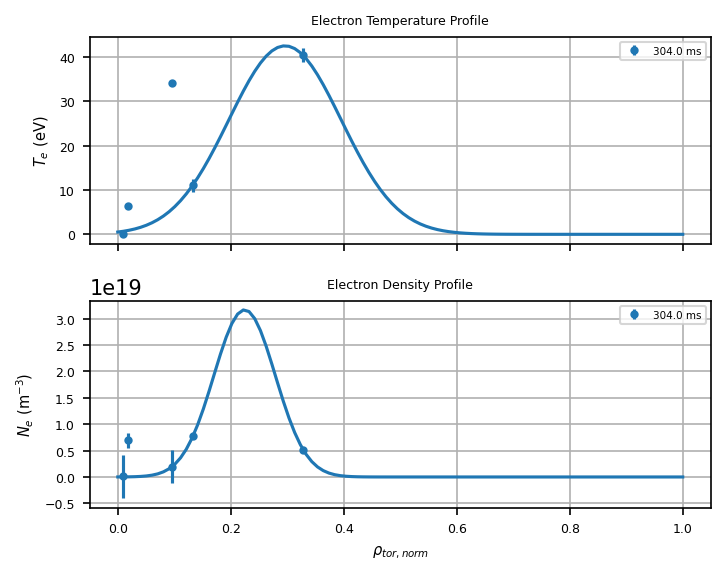

In [9]:
def save_thomson_plot_to_file(ods_obj, png_path):
    plt.close("all")
    vaft.plot.plot_thomson_profiles(ods_obj, save_opt=1, file_name=png_path)
png_paths = []

ods_base = deepcopy(ods2)  # 원본 보존

for cfg in fit_cases:
    ods_m = deepcopy(ods_base)

    # (중요) 기존 core_profiles 키 자체를 없애고 새로 채우는 게 안전
    if 'core_profiles' in ods_m:
        del ods_m['core_profiles']

    for time_ms in time_ms_list:
        mapped_rho = mapped_rho_cache[time_ms]

        n_e_fn, T_e_fn, *_ = vaft.process.profile_fitting_thomson_scattering(
            ods_m, time_ms, mapped_rho,
            Te_order=cfg["Te_order"],
            Ne_order=cfg["Ne_order"],
            fitting_function_te=cfg["te"],
            fitting_function_ne=cfg["ne"],
        )

        ods_m = vaft.process.core_profiles(ods_m, time_ms, mapped_rho, n_e_fn, T_e_fn)
        omas.omas_physics.core_profiles_pressures(ods_m, update=True)

    png_path = os.path.join(outdir, f"shot{shot}_{cfg['name'].replace(' ','_')}.png")
    png_path = os.path.join(outdir, f"shot{shot}_{cfg['name'].replace(' ','_')}.png")
    save_thomson_plot_to_file(ods_m, png_path)
    png_paths.append((cfg["name"], png_path))


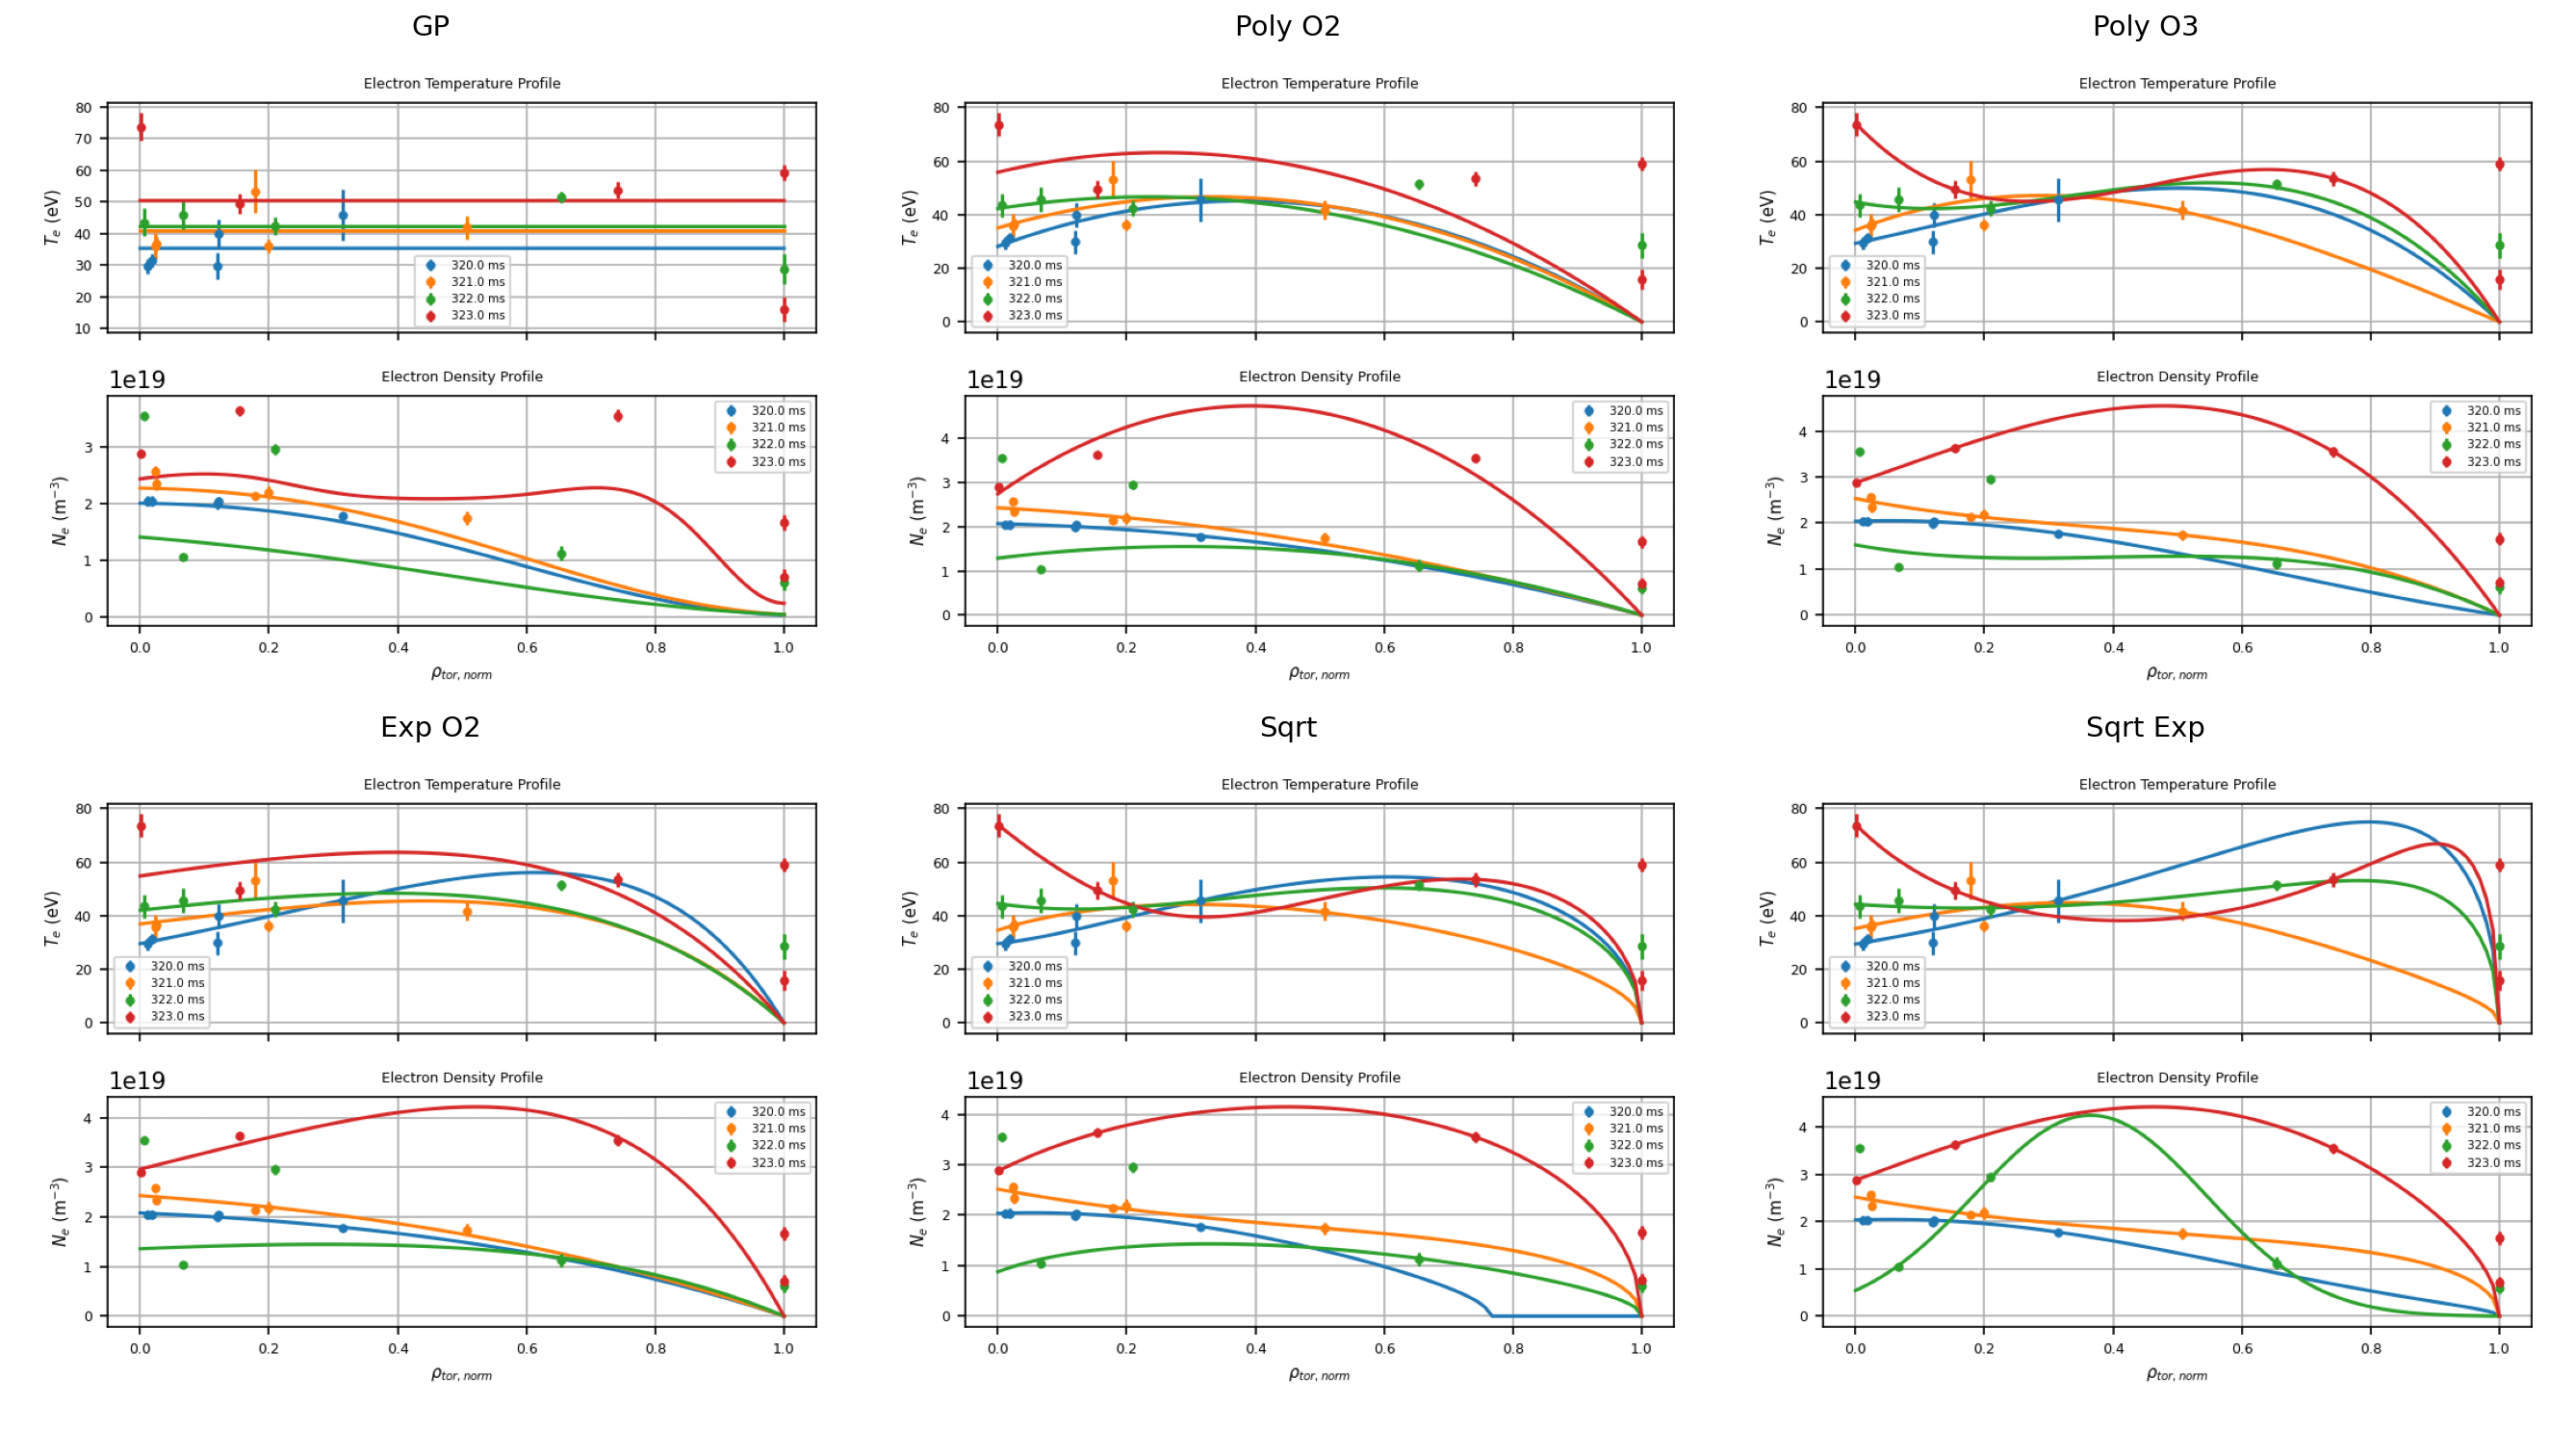

In [ ]:
import matplotlib.image as mpimg

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for ax, (name, path) in zip(axes, png_paths):
    img = mpimg.imread(path)
    ax.imshow(img)
    ax.set_title(name, fontsize=14)
    ax.axis("off")

plt.tight_layout()
plt.show()

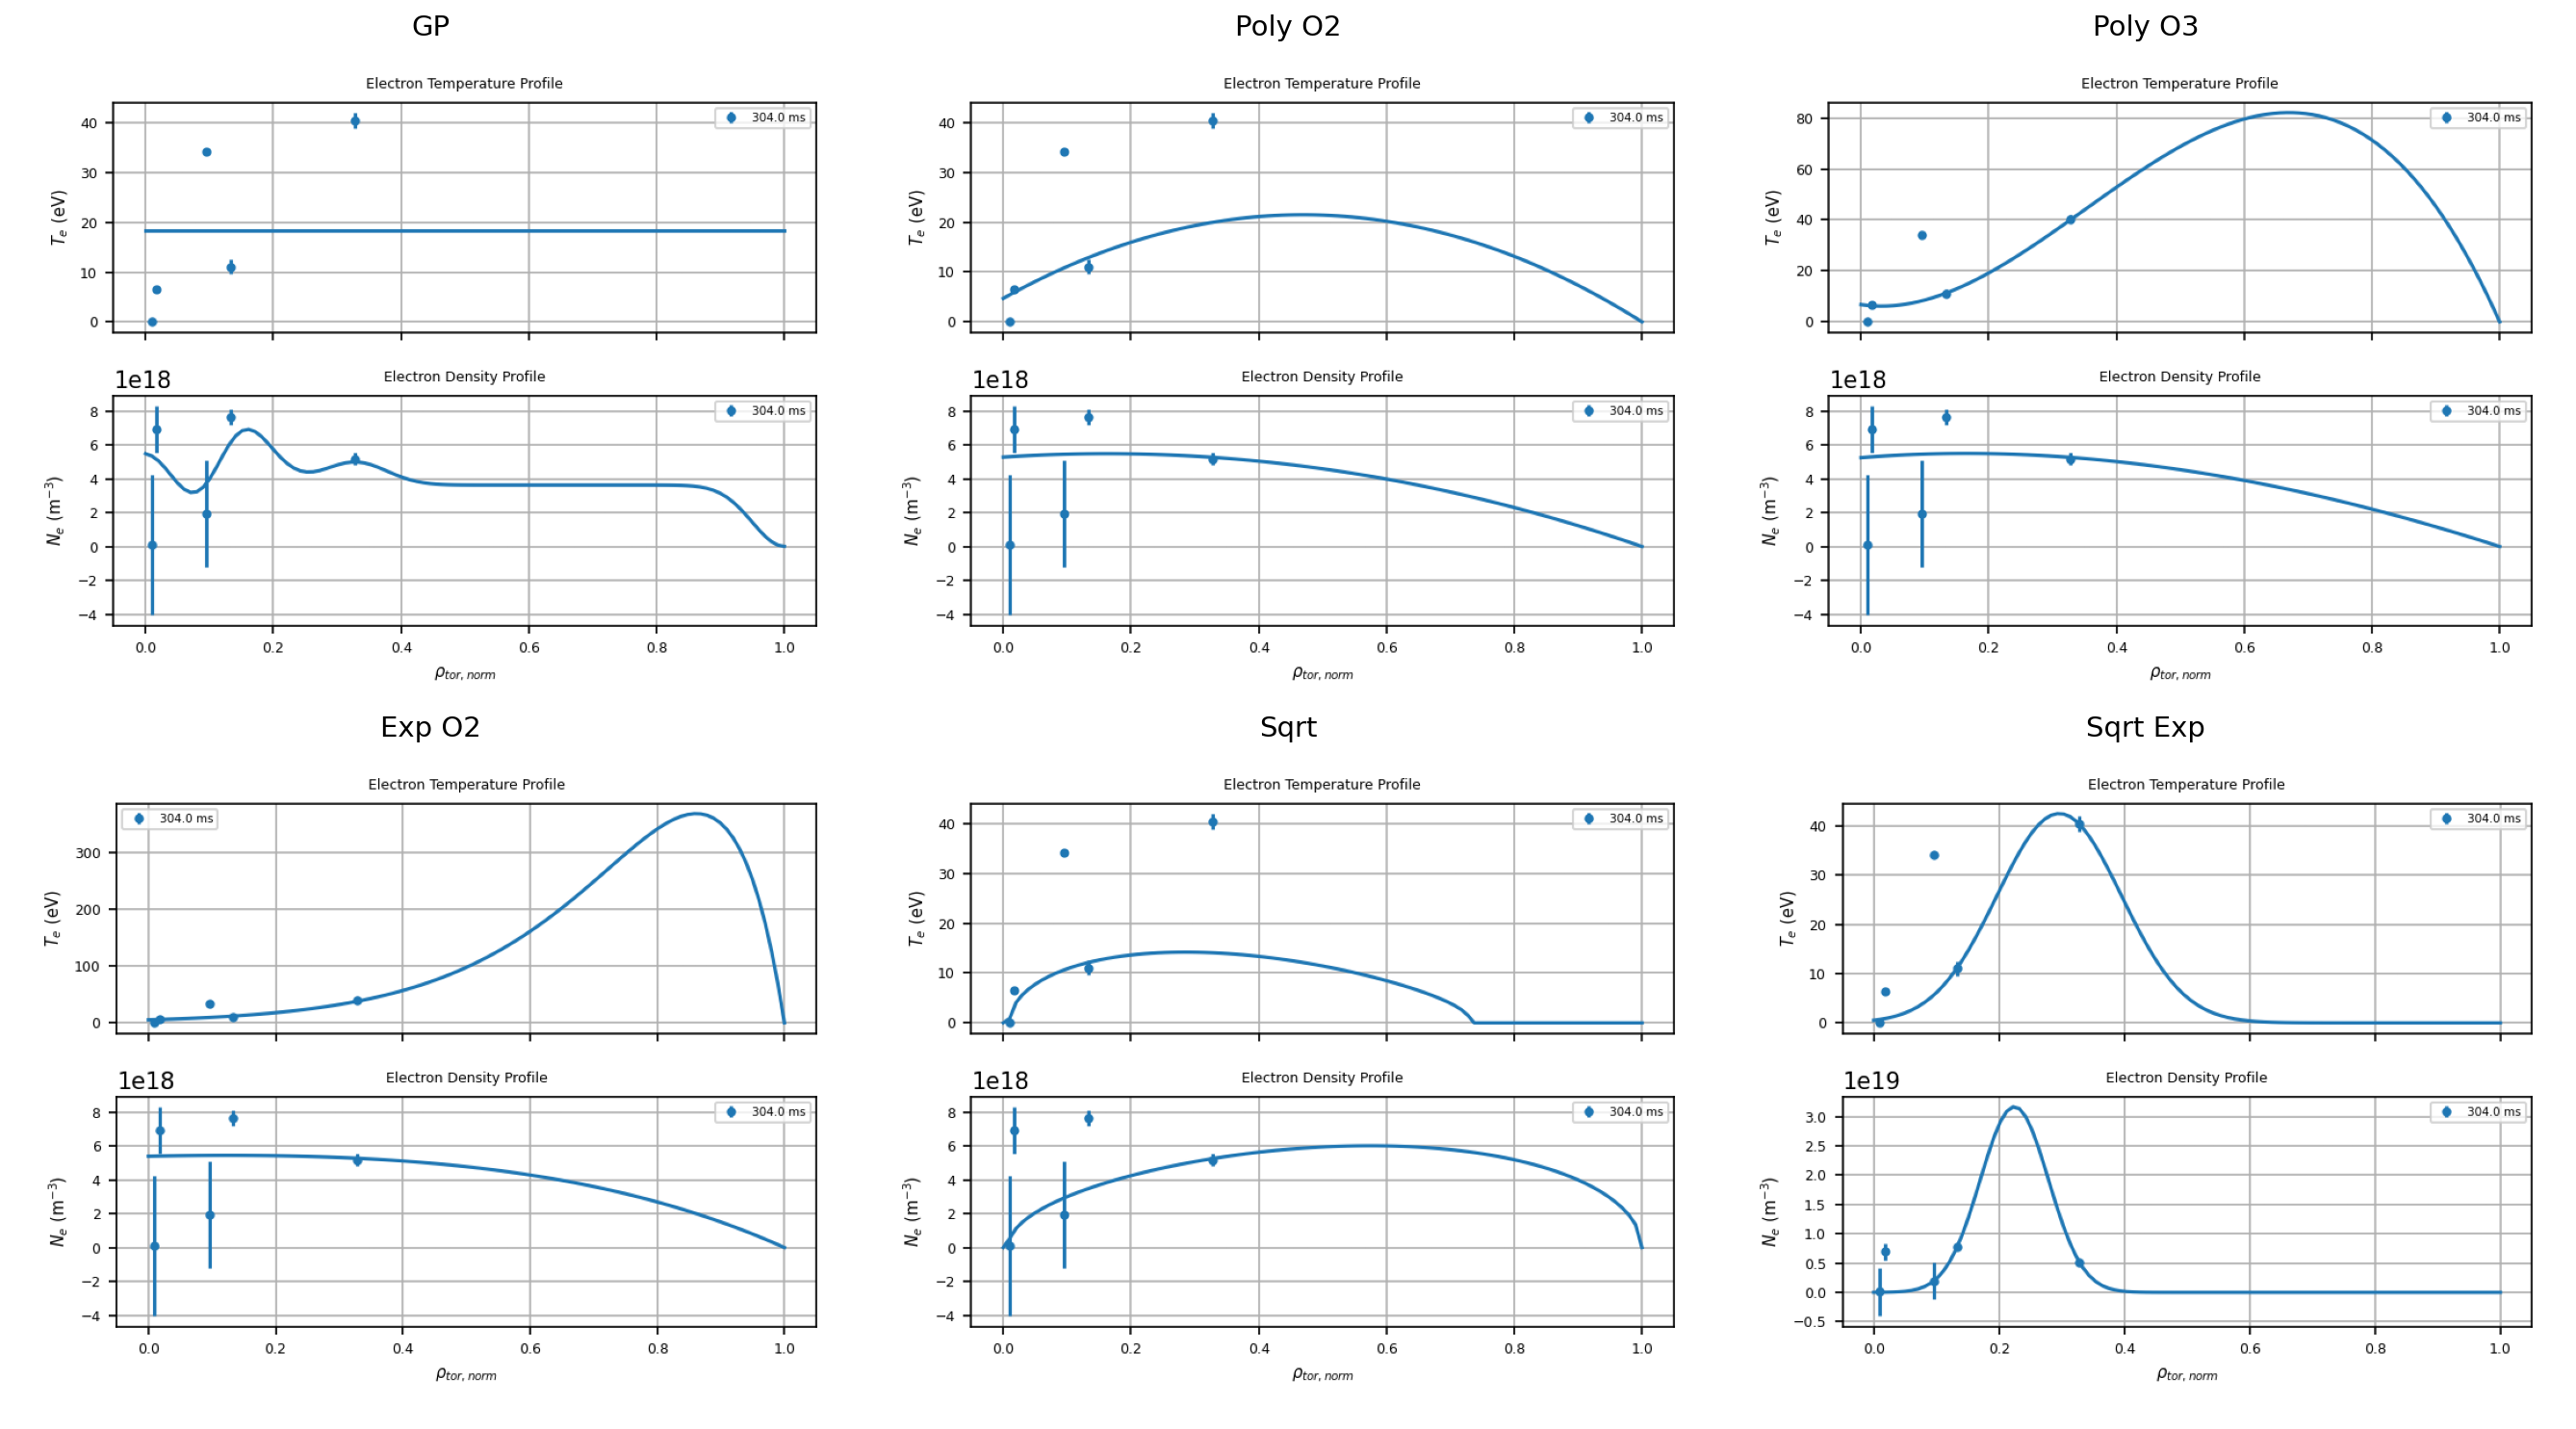

In [10]:
import matplotlib.image as mpimg

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for ax, (name, path) in zip(axes, png_paths):
    img = mpimg.imread(path)
    ax.imshow(img)
    ax.set_title(name, fontsize=14)
    ax.axis("off")

plt.tight_layout()
plt.show()

### **Arbitrary generation of kinetic profile**

In [3]:
ods = vaft.database.load(40330,'public')

Successfully loaded ODS data for shot: 40330


In [8]:
ods['equilibrium.time']

array([0.32 , 0.321, 0.322, 0.323])

In [10]:
for time_idx, time_ms in enumerate(ods['equilibrium.time']*1e3):
    print(f"Time index: {time_idx}, Time (ms): {time_ms}")
    ods_eq = vaft.process.core_profiles_from_eq(
            ods,
            eq_time_index=time_idx,
            Te0_eV=40.0,
        )

Time index: 0, Time (ms): 320.0
[INFO] Removed duplicate core_profile at 320.000 ms (index 3)
[UPDATED] core_profile from eq pressure (P=2neTe) at 320.000 ms (index 3), eq_time_slice=0
Time index: 1, Time (ms): 321.0
[INFO] Removed duplicate core_profile at 321.000 ms (index 0)
[UPDATED] core_profile from eq pressure (P=2neTe) at 321.000 ms (index 3), eq_time_slice=1
Time index: 2, Time (ms): 322.0
[INFO] Removed duplicate core_profile at 322.000 ms (index 0)
[UPDATED] core_profile from eq pressure (P=2neTe) at 322.000 ms (index 3), eq_time_slice=2
Time index: 3, Time (ms): 323.0
[INFO] Removed duplicate core_profile at 323.000 ms (index 0)
[UPDATED] core_profile from eq pressure (P=2neTe) at 323.000 ms (index 3), eq_time_slice=3


[INFO] Found 4 core_profiles entries


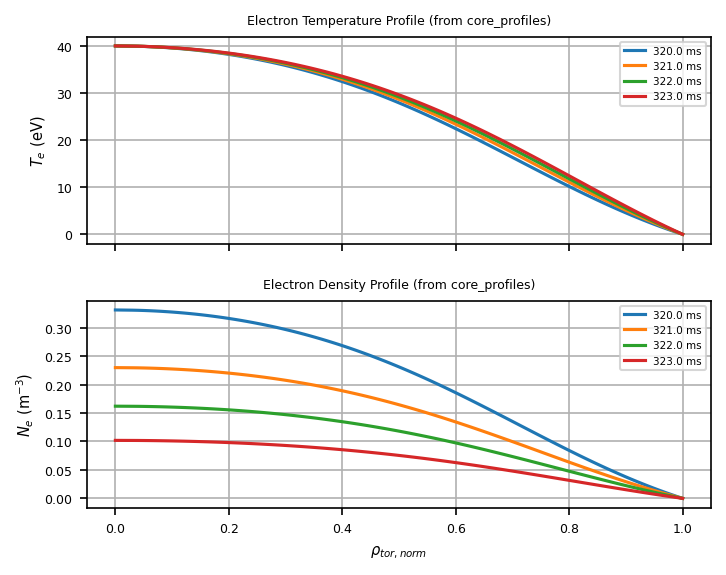

In [11]:
vaft.plot.plot_TeNe_from_eq(ods_eq)